# Data Statistics Analysis

### Read and Combine Data

In [131]:
import pandas as pd

# read in all data
test = pd.read_csv('../data/test.txt', delimiter=';',names=['text', 'target'])
train = pd.read_csv('../data/train.txt', delimiter=';',names=['text', 'target'])
val = pd.read_csv('../data/val.txt', delimiter=';',names=['text', 'target'])

# display size of splits
print('test:     ',test.shape)
print('train:    ',train.shape)
print('val:      ',val.shape)

# combine all data and display size
data = pd.concat([test,train,val])
print('combined: ',data.shape)

# display sample of data
data.sample(20)

test:      (2000, 2)
train:     (16000, 2)
val:       (2000, 2)
combined:  (20000, 2)


,text,target
4253,i find myself feeling surprised and totally un...,surprise
2837,i carry the usual guilt of feeling selfish and...,anger
376,ill get round to it this quarter im feeling ho...,joy
5825,i have grown accustomed to the creative freedo...,fear
8704,i feel passionate about and feeling so utterly...,joy
1022,i have no idea what to do i have no idea how t...,sadness
13626,i just feel so damaged hurt and in severe ment...,sadness
7357,i are both aware i have many personal reasons ...,love
8629,i am not desperate for a job and don t really ...,surprise
13675,i also feel that seeing how the body reacts is...,joy


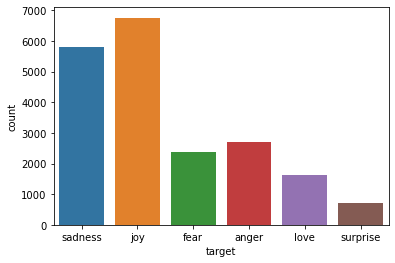

In [132]:
import seaborn as sns

# display counts for each label
sns.countplot(data.target)

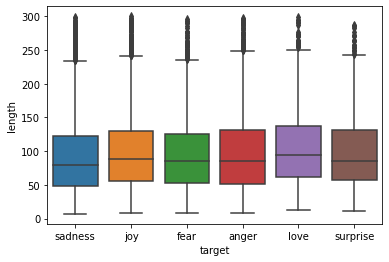

In [133]:
from matplotlib import pyplot as plt
%matplotlib inline

# add length of text strings
data['length'] = data.text.apply(lambda x: len(x))

plt.figure()
sns.boxplot(x='target', y='length',data=data)

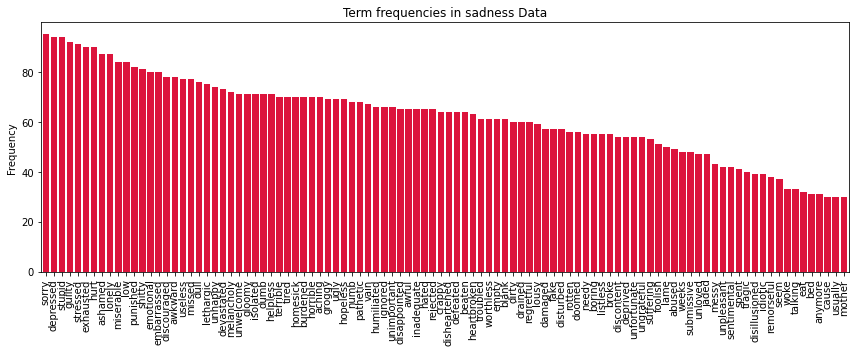

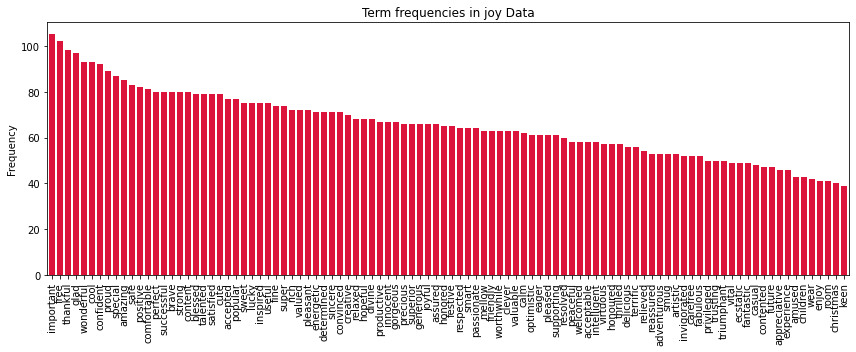

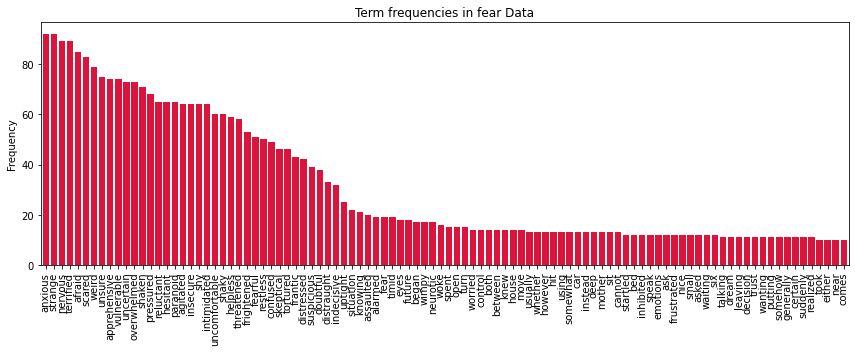

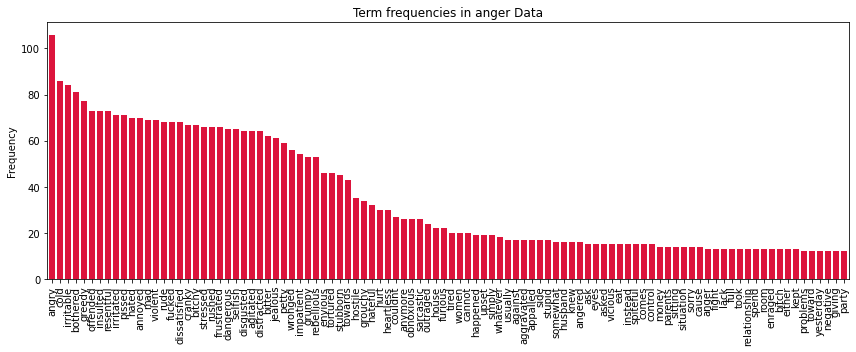

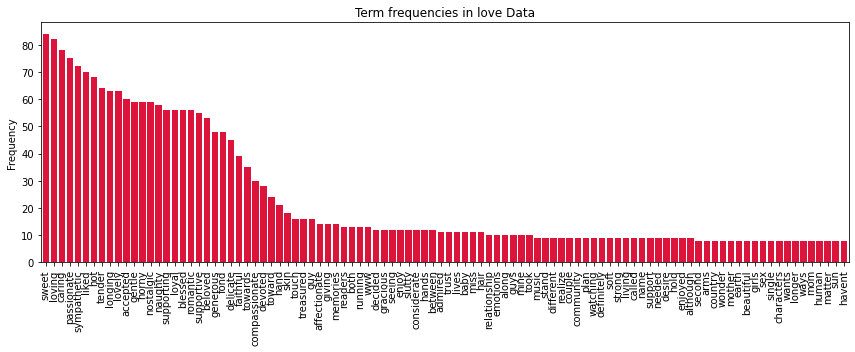

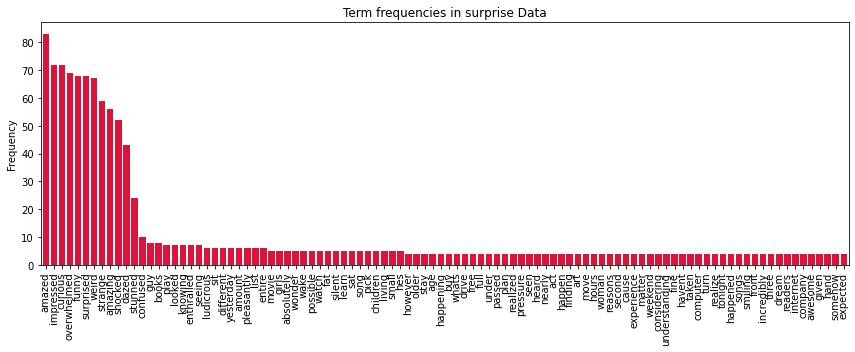

In [140]:
from collections import Counter
import numpy as np

def word_freq(data,num,exclude):
    alltext = ' '.join(data)
    all_list = alltext.split()

    all_list = [s for s in all_list if len(s) > 2] # remove short common words
    all_list = [s for s in all_list if s not in exclude]

    tf = Counter(all_list)

    y = [count for tag, count in tf.most_common(num)]
    x = [tag for tag, count in tf.most_common(num)]
    return x, y

def plot_hist(x, y, txt):
    plt.figure(figsize=(12,5))
    plt.bar(x, y, color='crimson')
    plt.title("Term frequencies in {} Data".format(txt))
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.xlim(-0.6, len(x)-0.4)  # optionally set tighter x lims
    plt.tight_layout()  # change the whitespace such that all labels fit nicely
    plt.show()


# plot word frequency historgams
num = 100; done = False
exclude = ['feel']
while not done:
    sx, sy = word_freq(data[data.target.eq('sadness')].text, num, exclude)  
    jx, jy = word_freq(data[data.target.eq('joy')].text, num, exclude)  
    fx, fy = word_freq(data[data.target.eq('fear')].text, num, exclude) 
    ax, ay = word_freq(data[data.target.eq('anger')].text, num, exclude)  
    lx, ly = word_freq(data[data.target.eq('love')].text, num, exclude)  
    ux, uy = word_freq(data[data.target.eq('surprise')].text, num, exclude) 
    alltop = sx + jx + fx + ax + lx + ux
    c = Counter(alltop)
    if c.most_common(1)[0][1] > 3:
        for key in c:
            if c[key] > 2:
                exclude.append(key)
    else:
        done = True

plot_hist(sx, sy, 'sadness')
plot_hist(jx, jy, 'joy')
plot_hist(fx, fy, 'fear')
plot_hist(ax, ay, 'anger')
plot_hist(lx, ly, 'love')
plot_hist(ux, uy, 'surprise')


In [135]:
from sklearn.feature_extraction.text import CountVectorizer

# binary feature encoding
vec = CountVectorizer(binary=True)
vec.fit(data.text)
pd.DataFrame(vec.transform(data.text).toarray(), columns=sorted(vec.vocabulary_.keys()))

,aa,aaaaaaand,aaaaand,aaaah,aaaand,aac,aahhh,aaron,ab,abandon,...,zonisamide,zoo,zoom,zooming,zooms,zq,zucchini,zum,zumba,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
